### 1. 문제정의(목표)
- iris(붓꽃)의 꽃잎 길이, 꽃잎 너비, 꽃받침 길이, 꽃받침 너비 특성들 활용하여 3가지 품종을 분류해보자!
- KNN 모델의 이웃(k)숫자를 조절해보자(하이퍼파라미터 튜닝)

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn에서 지원하는 학습용 iris 데이터셋을 임포트
from sklearn.datasets import load_iris
# KNN 모델 임포트
from sklearn.neighbors import KNeighborsClassifier
# 학습한 모델을 평가하기 위한 평가지표들을 불러오기 위해 임포트
from sklearn import metrics

### 2. 데이터 수집
- 학습용으로 제작된 iris 데이터를 로드

In [81]:
# 딕셔너리 형태로 데이터가 구성되어 있음      #target_names의 setosa 0번, versicolor 1번 virginica 2번
iris_data = load_iris()
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [82]:
# data : 문제 데이터
# target : 정답 데이터
# target_names : 정답 데이터 명
# feature_names : 문제 데이터 컬럼명
# DESCR : 데이터셋에 대한 설명
# filename : 파일 경로 및 이름

### 3. 데이터 전처리
- 학습용으로 만들어진 데이터이기 때문에 전처리는 필요하지 않음!

### 4. 탐색적 데이터 분석
- 데이터의 구조를 확인해보자!

In [83]:
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

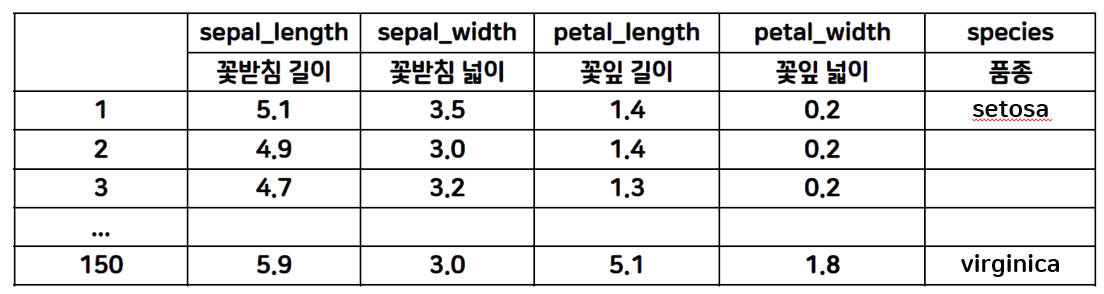

In [84]:
iris_data['data']
# iris_data.data와 같은 개념

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [85]:
iris_data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [86]:
print(iris_data['data'].shape)
print(iris_data['target'].shape)

(150, 4)
(150,)


In [87]:
print(iris_data['target_names'])

['setosa' 'versicolor' 'virginica']


In [88]:
print(iris_data['target_names'][2])

virginica


In [89]:
print(iris_data['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [90]:
print(iris_data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

- 기계 학습을 위해 데이터 프레임 형식으로 문제 데이터를 변환해보자!
- 컬럼명은 feature_names로 삽입할 것!

In [91]:
iris_df = pd.DataFrame(iris_data['data'],columns = iris_data['feature_names'])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


- 문제(X), 정답(y)으로 분리

In [92]:
X = iris_df 
y = iris_data['target']

In [93]:
X.shape,y.shape

((150, 4), (150,))

- 학습(train), 평가(test) 데이터로 분리

In [94]:
# 학습, 평가 데이터를 자동으로 분리해주는 명령(랜덤으로 샘플링)
from sklearn.model_selection import train_test_split

# train_test_split(문제, 정답, 평가데이터의 비율, 랜덤 시드값 설정)
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3, # test 30%
                                                    random_state=10
                                                   )

In [95]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


- 데이터셋으로 시각화를 해보자!
- 한번에 여러 특성들을 비교할 수 있는 산점도 매트릭스를 활용해보자!

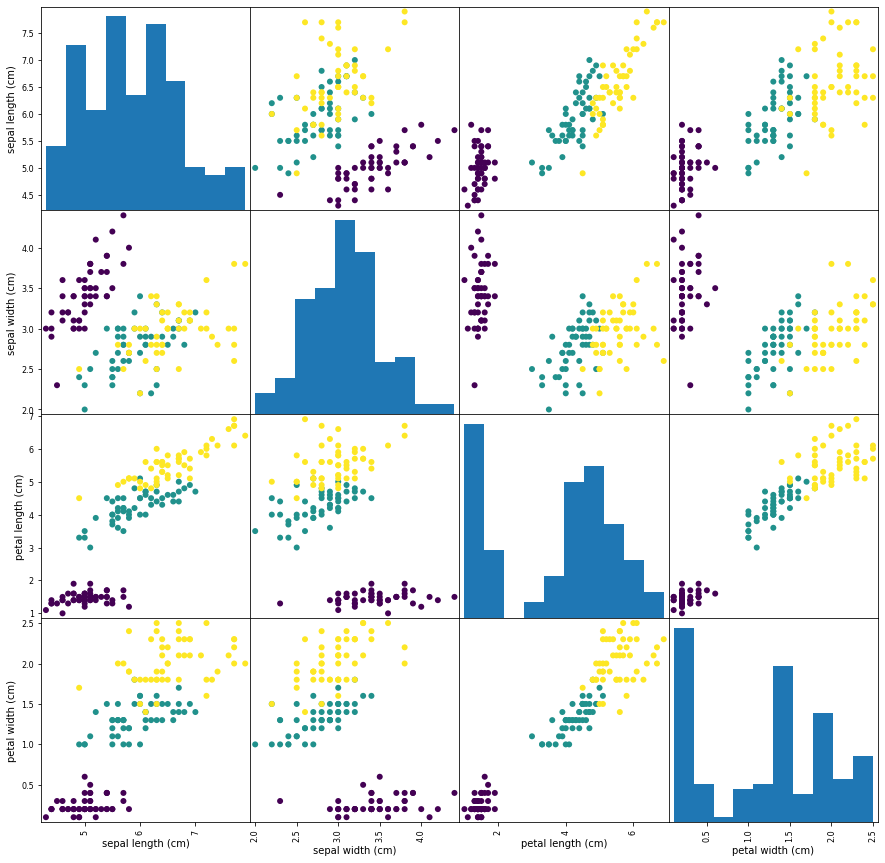

In [96]:
# 판다스에서 제공하는 산점도 매트릭스를 생성하기!
pd.plotting.scatter_matrix(iris_df,           # 보고자하는 데이터를 넣어주기
                           # 매트릭스 전체 사이즈를 설정(가로,세로)
                           figsize=(15,15),  
                           # 데이터의 표시 형태를 설정(o:동그라미, s:네모, ^:세모)
                           marker='o',
                           # y = iris_data['target'], 정답데이터에 따라 색상이 자동설정
                           c = y,
                           # 매트릭스의 투명도를 설정 : 0(투명) ~ 1(불투명)
                           alpha=1
                          );

### 5. 모델링(모델선택,학습,평가)
- KNN 모델 불러오기
- 모델 학습
- 학습된 모델로 정답을 예측
- 실제 정답과 비교해서 평가
- 하이퍼파라미터 변경에 따라 그래프로 시각화

In [97]:
# KNN 모델 불러오기
knn_model = KNeighborsClassifier(n_neighbors=12)
# n_neighbors 값은 학습한 데이터에 root를 씌운 값을 먼저 적용해보자!

In [98]:
# 모델 학습
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [99]:
# 학습된 모델로 정답을 예측
pre = knn_model.predict(X_test)
pre

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0,
       1])

In [100]:
# 실제 정답과 비교해서 평가
metrics.accuracy_score(pre,y_test)
# 모델이 예측한 값과 원래 정답을 비교

1.0

In [101]:
# 예측 코드 없이 평가용 문제와 정답을 넣어서 바로 정확도를 확인
# X_test로 예측한 값과 y_test를 비교해서 바로 정확도까지 출력해주는 명령
knn_model.score(X_test,y_test)

1.0

### 반복문을 활용하여 하이퍼파라미터를 튜닝해보자!

In [102]:
# 이웃 개수에 따라서 변화되는 정확도 값을 넣어줄 빈 리스트 2개 만들기!
train_list = []
test_list = []

for k in range(1,100,2) :
    # 모델 생성 및 하이퍼파라미터에 변수를 넣어주자!
    knn_model = KNeighborsClassifier(n_neighbors=k)
    # 모델 학습
    knn_model.fit(X_train,y_train)
    
    #학습 데이터    train_list
    # 학습한 모델로 예측 후 실제 정답과 비교해서 정확도 값을 변수에 넣어주기!
    train_score = knn_model.score(X_train,y_train)
    # 비어있는 리스트에 정확도 값을 계속 넣어주자!
    train_list.append(train_score)
    
    # 평가 데이터   test_list
    test_score = knn_model.score(X_test,y_test)
    test_list.append(test_score)

<function matplotlib.pyplot.show(close=None, block=None)>

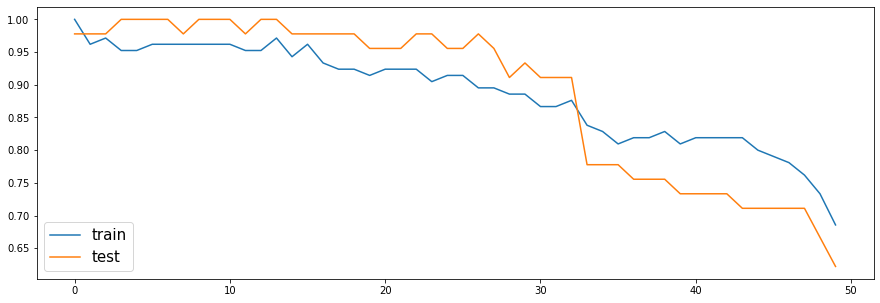

In [119]:
# 시각화
plt.figure(figsize=(15,5)) # 전체 그래프의 가로, 세로 크기 설정

plt.plot(train_list, label='train')
plt.plot(test_list, label='test')
# prop : 범례의 크기 설정
# loc : 범례의 위치 설정 (upper,center,lower), (left,center,right)
plt.legend(prop={'size':15}, loc='lower left') # 범례 표시
plt.show

- KNN 모델의 이웃수(n_neighbors)가 너무 많으면 예측성능이 떨어짐(과소적합 가능성↑)
- train 데이터의 정확도가 낮다면 학습자체가 잘 이루어지지 않았다는 뜻
- test 데이터는 test 데이터의 정확도 값만 가지고 판단하면 안돼요!
- test 데이터는 train 데이터와의 차이를 봐야함(차이가 크다면 과대적합의 위험도가 높다라고 판단해볼 수 있음)
- 그래프에서 train 데이터의 정확도와 test 데이터의 정확도의 값이 크면서 둘의 차이가 가장 적은곳이 일반화가 잘 된 부분